# Decision Tree and Random Forest Regressors

In [33]:
# Data wrangling
import pandas as pd
import numpy as np

# Machine learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# object import/export
from joblib import load

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')  # Warnings in the notebook


## 1. Retrieving everything

In [28]:
# Importing our best regressor
RF_BEST = '../../classifiers/best_rf.joblib'


First of all, we load the dataset and split in the same way as we did fotr the training :

In [29]:
data = pd.read_csv('../../data/ready.csv').drop(['Unnamed: 0'], axis = 1)

X = data.drop('price', axis = 1)
Y = data['price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape:  (210107, 24)
Y_train shape:  (210107,)
X_test shape:  (90046, 24)
Y_test shape:  (90046,)


## 2. Prediction

In [37]:
# lets use our best model to predict the points of the test set
best_rf = load(RF_BEST)
y_pred = best_rf.predict(X_test)
# print('MSE : ', mean_squared_error(Y_test, y_pred))
# print('MAE : ', mean_absolute_error(Y_test, y_pred))
print('R2 : ', r2_score(Y_test, y_pred))

R2 :  0.983399035791903


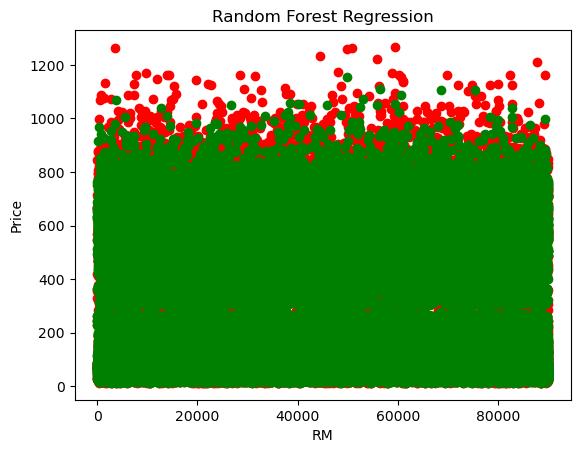

In [32]:
# visualization
plt.scatter(range(Y_test.shape[0]), Y_test, color = 'red')
plt.scatter(range(Y_test.shape[0]), y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('RM')
plt.ylabel('Price')
plt.show() 


Bon c'est moche

Text(0.5, 1.0, 'Distribution of difference between actual price and price prediction')

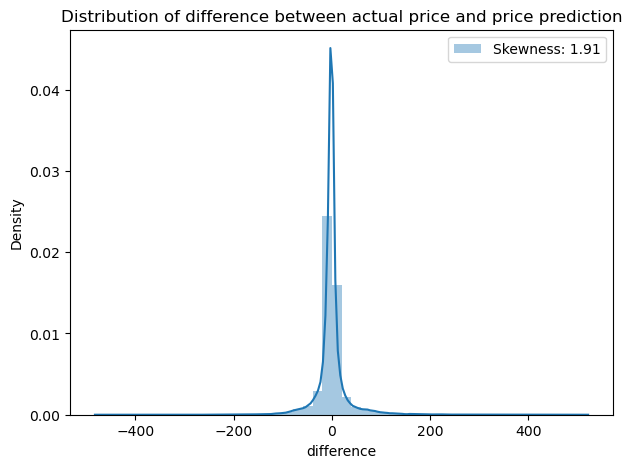

In [43]:
plt.figure(figsize = (7, 5))
Y_diff = Y_test-y_pred
sns.distplot(Y_diff, label = 'Skewness: {:.2f}'.format(Y_diff.skew()))
plt.legend()#loc = 'best')
plt.xlabel('difference')

plt.title('Distribution of difference between actual price and price prediction')

## bioutifoulle